**BUSINESSCASE - NETFLIX DATASET**

**Business Problem**

Analyze the data and generate insights that could help Netflix ijn deciding which type of shows/movies to produce and how they can grow the business in different countries

Defining required Python Libraries:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Gathering the dataset as dataframe:

In [2]:
df=pd.read_csv('Netflix_dataset.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Looking into the acquired DataSet information:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
df.shape

(8807, 12)

In [5]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [6]:
df.describe(include='object').T

,count,unique,top,freq
show_id,8807,8807,s1,1
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362


In [7]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
df.isnull().sum()/len(df)*100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [9]:
df['type'].value_counts(normalize=True)

Movie      0.696151
TV Show    0.303849
Name: type, dtype: float64

<Axes: ylabel='type'>

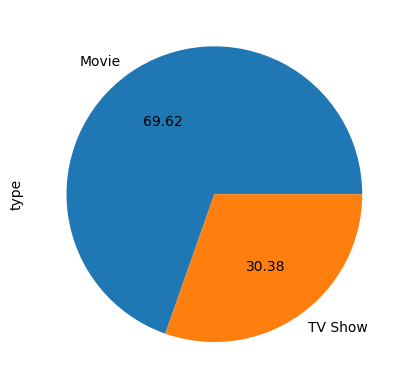

In [10]:
df['type'].value_counts().plot(kind='pie',autopct="%.2f")

In [11]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


**Unnesting the columns of cast and listed_in columns**

In [12]:
df.shape

(8807, 12)

**Unnesting the cast**

In [13]:
df['cast']=df['cast'].astype('str')
df['cast']=df['cast'].str.split(",")
df=df.explode('cast')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,nan,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Thabang Molaba,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8806,s8807,Movie,Zubaan,Mozez Singh,Manish Chaudhary,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Meghna Malik,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Malkeet Rauni,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [14]:
df['listed_in']=df['listed_in'].astype('str')
df['listed_in']=df['listed_in'].str.split(",")
df = df.explode('listed_in')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,nan,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...


**Handling null values**

In [15]:
df.isnull().sum()

show_id             0
type                0
title               0
director        44621
cast                0
country         11145
date_added        158
release_year        0
rating             67
duration            3
listed_in           0
description         0
dtype: int64

In [16]:
df['director']=df['director'].fillna('Unknown director')
df['director'].isnull().sum()

0

In [17]:
df.isnull().sum()

show_id             0
type                0
title               0
director            0
cast                0
country         11145
date_added        158
release_year        0
rating             67
duration            3
listed_in           0
description         0
dtype: int64

In [18]:
df[['country','rating']] = df[['country','rating']].fillna('Unknown')

In [19]:
df['duration'] = df['duration'].fillna(0)

In [20]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,nan,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown director,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."


In [21]:
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [22]:
df.nunique()

show_id          8807
type                2
title            8807
director         4529
cast            39297
country           749
date_added       1767
release_year       74
rating             18
duration          221
listed_in          73
description      8775
dtype: int64

<Axes: xlabel='rating', ylabel='count'>

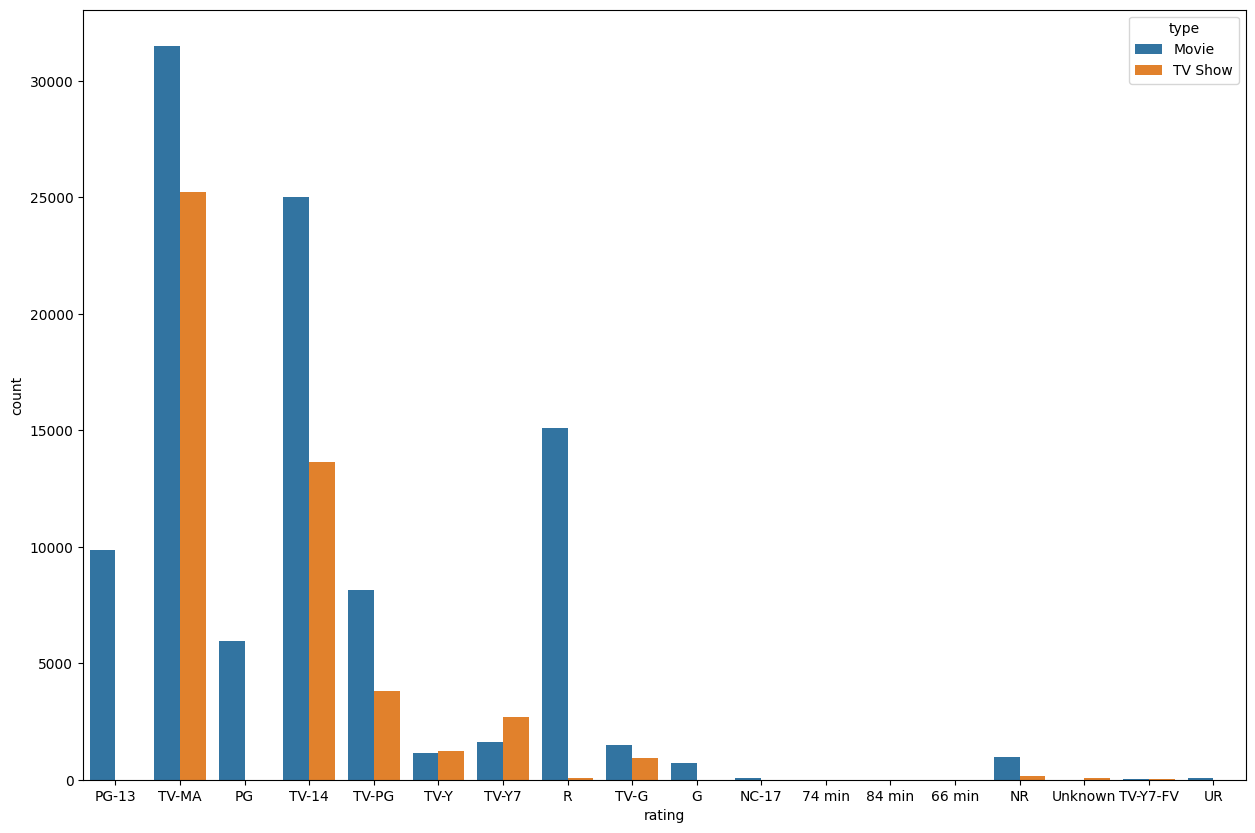

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.countplot(x='rating', hue='type', data=df)

<Axes: xlabel='release_year', ylabel='Count'>

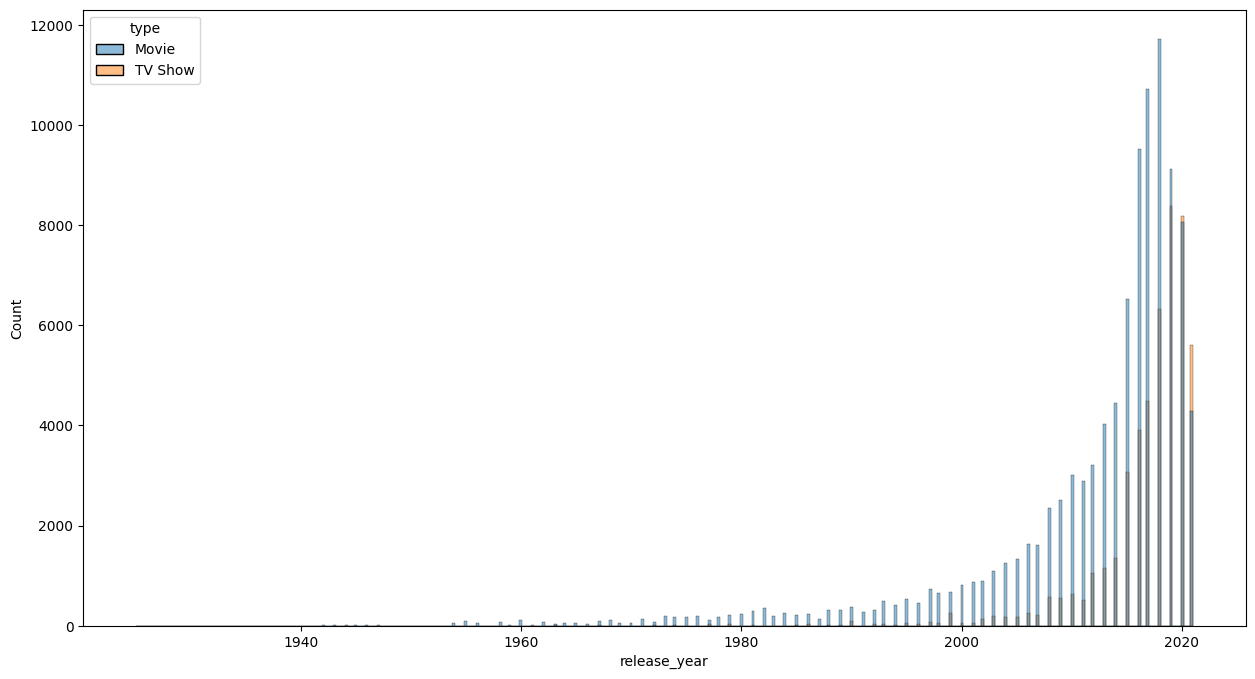

In [24]:
plt.figure(figsize=(15,8))
sns.histplot(x='release_year',hue='type',data=df)




---



**Comparison of tv shows vs. movies.**

---



In [25]:
df_movies = df[df['type']=='Movie']
top10_movies = pd.DataFrame(df_movies.groupby('country')['title'].nunique()).reset_index().sort_values(ascending=False,by='title').head(10)
top10_movies

,country,title
525,United States,2058
218,India,893
640,Unknown,440
440,United Kingdom,206
50,Canada,122
384,Spain,97
128,Egypt,92
319,Nigeria,86
238,Indonesia,77
278,Japan,76


In [26]:
df_shows = df[df['type']=='TV Show']
top10_shows = pd.DataFrame(df_shows.groupby('country')['title'].nunique()).reset_index().sort_values(ascending=False,by='title').head(10)
top10_shows

,country,title
160,United States,760
195,Unknown,391
140,United Kingdom,213
83,Japan,169
120,South Korea,158
66,India,79
132,Taiwan,68
17,Canada,59
47,France,49
125,Spain,48


<Axes: xlabel='country', ylabel='title'>

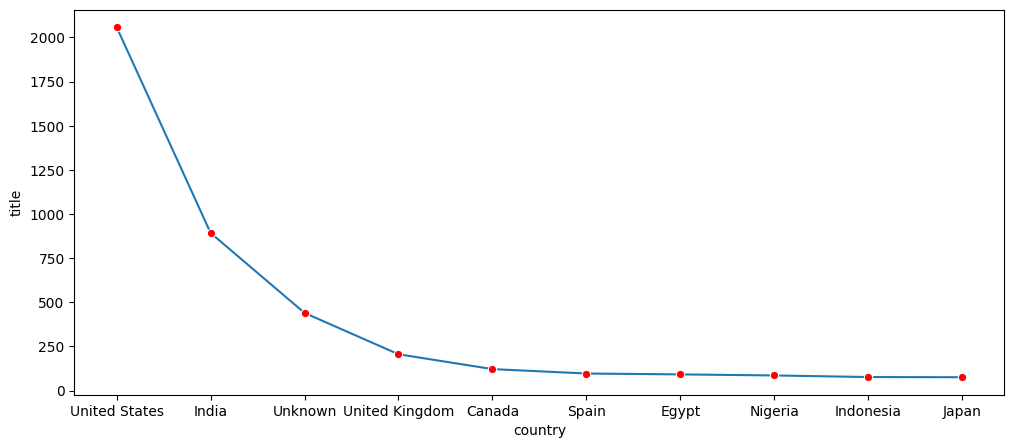

In [27]:
plt.figure(figsize=(12,5))
sns.lineplot(x='country',y='title', data=top10_movies,marker='o',markerfacecolor='red')

<Axes: xlabel='country', ylabel='title'>

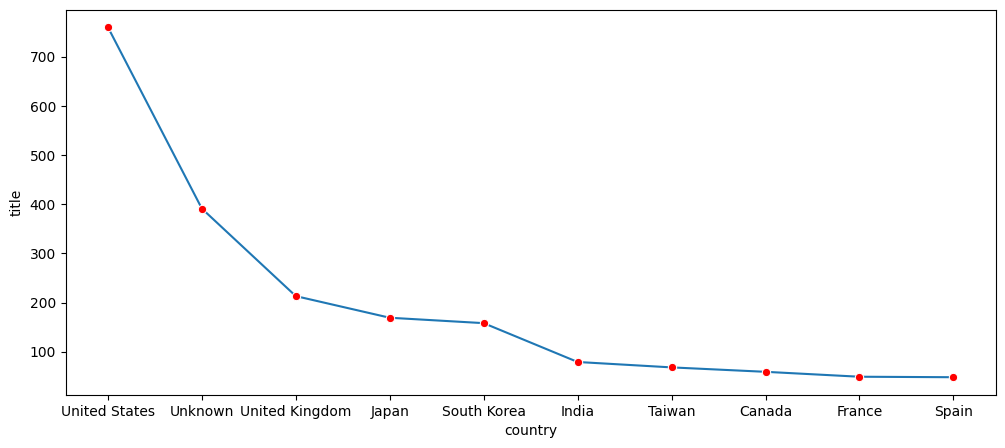

In [28]:
plt.figure(figsize=(12,5))
sns.lineplot(x='country',y='title', data=top10_shows,marker='o',markerfacecolor='red')



---



**What is the best time to launch a TV show?**

---



In [29]:
df['date_added'] = pd.to_datetime(df['date_added']) # will leave to explore how you can mention datetime format by your own
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149512 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       149512 non-null  object        
 1   type          149512 non-null  object        
 2   title         149512 non-null  object        
 3   director      149512 non-null  object        
 4   cast          149512 non-null  object        
 5   country       149512 non-null  object        
 6   date_added    149512 non-null  datetime64[ns]
 7   release_year  149512 non-null  int64         
 8   rating        149512 non-null  object        
 9   duration      149512 non-null  object        
 10  listed_in     149512 non-null  object        
 11  description   149512 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 14.8+ MB


In [30]:
df['date_added_week'] = df['date_added'].dt.week

<ipython-input-30-668c33cd5595>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['date_added_week'] = df['date_added'].dt.week


In [31]:
df['date_added_month'] = df['date_added'].dt.month

In [32]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_week,date_added_month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,nan,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",38,9
1,s2,TV Show,Blood & Water,Unknown director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",38,9
1,s2,TV Show,Blood & Water,Unknown director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",38,9
1,s2,TV Show,Blood & Water,Unknown director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",38,9
1,s2,TV Show,Blood & Water,Unknown director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",38,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...,9,3
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...,9,3
8806,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...,9,3
8806,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...,9,3


In [33]:
top10_bestweek = pd.DataFrame(df.groupby('date_added_week')['title'].nunique().reset_index().sort_values(ascending=False,by='title')).head(10)

<Axes: xlabel='date_added_week', ylabel='title'>

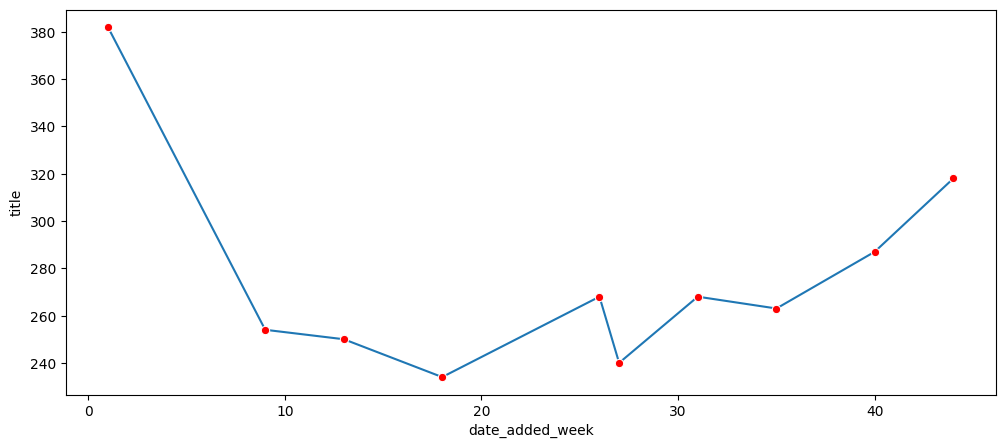

In [34]:
plt.figure(figsize=(12,5))
sns.lineplot(x='date_added_week',y='title', data=top10_bestweek,marker='o',markerfacecolor='red')

In [35]:
date_added_months = pd.DataFrame(df.groupby('date_added_month')['title'].nunique().reset_index().sort_values(ascending=False,by='title'))
date_added_months

,date_added_month,title
6,7,827
11,12,813
8,9,770
3,4,764
9,10,760
7,8,755
0,1,748
2,3,742
5,6,728
10,11,705


<Axes: xlabel='date_added_week', ylabel='count'>

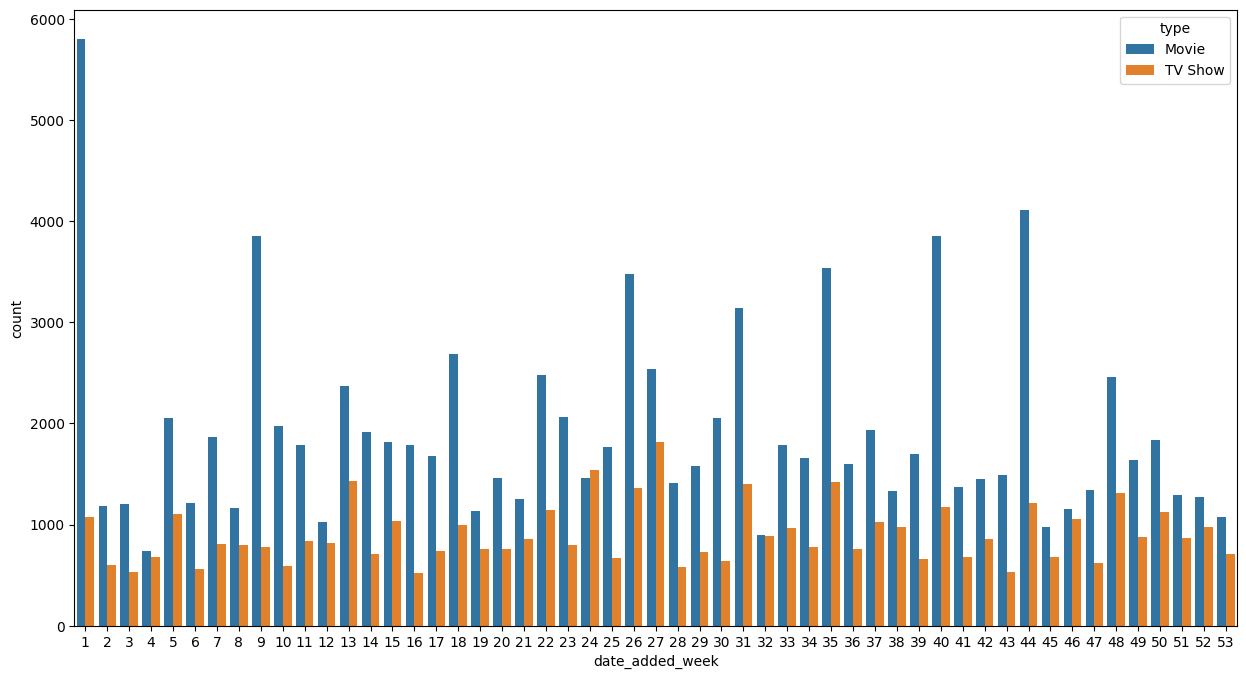

In [36]:
plt.figure(figsize=(15,8))
sns.countplot(x='date_added_week',hue='type', data=df)

<Axes: xlabel='date_added_month', ylabel='count'>

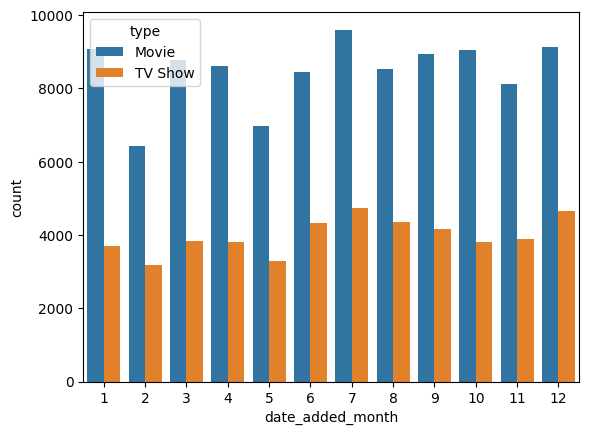

In [37]:
sns.countplot(x='date_added_month',hue='type', data=df)



---

**Analysis of actors/directors of different types of shows/movies.**

---



In [38]:
top10_actors = df.groupby('cast')['title'].nunique().reset_index().sort_values(ascending=False,by='title').head(10)
top10_actors

,cast,title
39283,nan,825
2612,Anupam Kher,39
26941,Rupa Bhimani,31
30303,Takahiro Sakurai,30
15541,Julie Tejwani,28
23624,Om Puri,27
25410,Rajesh Kava,26
38445,Shah Rukh Khan,26
1905,Andrea Libman,25
4186,Boman Irani,25


<Axes: xlabel='cast', ylabel='title'>

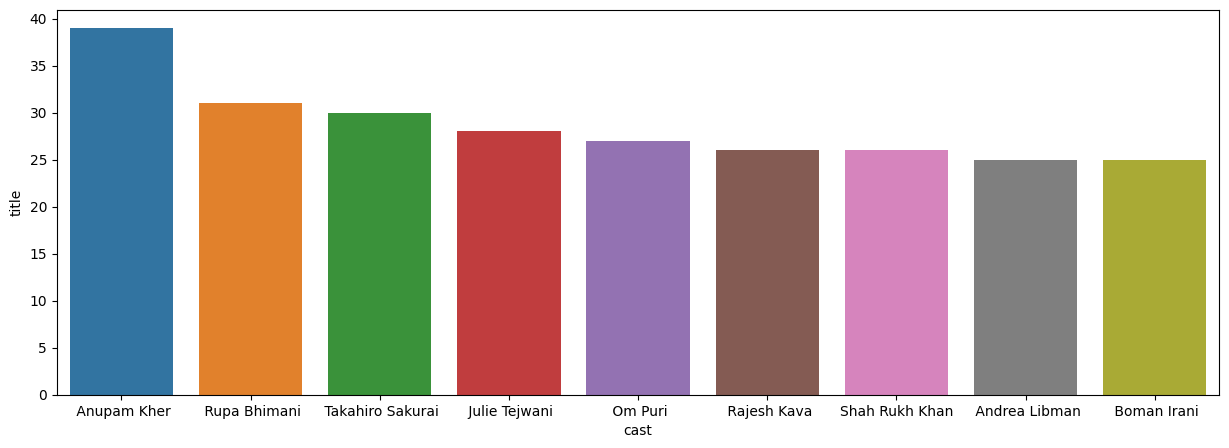

In [39]:
plt.figure(figsize=(15,5))
sns.barplot(x='cast',y='title', data=top10_actors[1:])

In [40]:
top10_directors = df.groupby('director')['title'].nunique().reset_index().sort_values(ascending=False,by='title').head(10)
top10_directors

,director,title
4303,Unknown director,2634
3392,Rajiv Chilaka,19
3443,"Raúl Campos, Jan Suter",18
2598,Marcus Raboy,16
4046,Suhas Kadav,16
1790,Jay Karas,14
685,Cathy Garcia-Molina,13
2671,Martin Scorsese,12
1787,Jay Chapman,12
4481,Youssef Chahine,12


<Axes: xlabel='director', ylabel='title'>

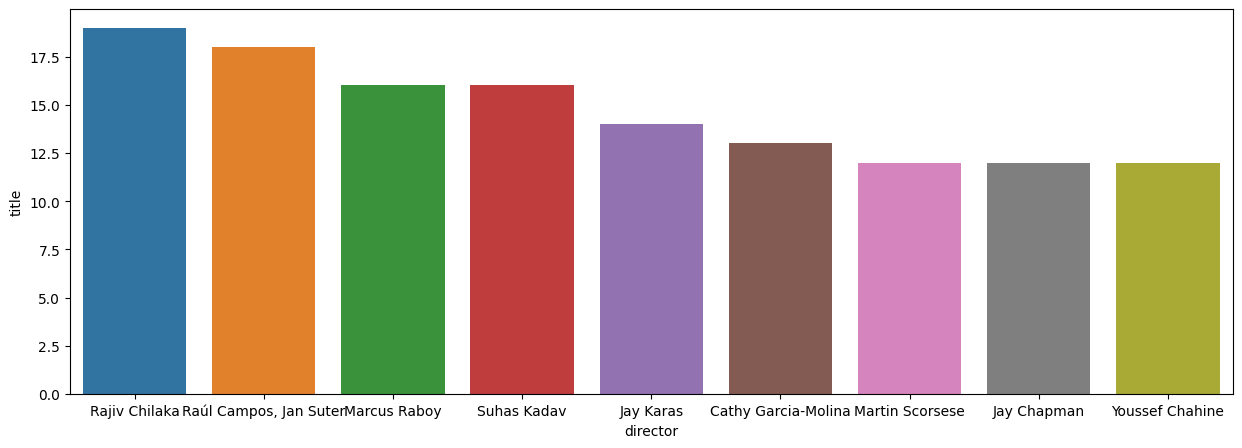

In [41]:
plt.figure(figsize=(15,5))
sns.barplot(x='director',y='title', data=top10_directors[1:])

In [42]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_week,date_added_month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,nan,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",38,9
1,s2,TV Show,Blood & Water,Unknown director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",38,9
1,s2,TV Show,Blood & Water,Unknown director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",38,9
1,s2,TV Show,Blood & Water,Unknown director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",38,9
1,s2,TV Show,Blood & Water,Unknown director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",38,9




---


**Which genre movies are more popular or produced more**

---



In [43]:
top10_genre = df.groupby('listed_in')['title'].nunique().reset_index().sort_values(ascending=False,by='title').head(10)
top10_genre

,listed_in,title
13,International Movies,2624
49,Dramas,1600
44,Comedies,1210
37,Action & Adventure,859
47,Documentaries,829
9,Dramas,827
53,International TV Shows,774
12,Independent Movies,736
30,TV Dramas,696
20,Romantic Movies,613


<Axes: xlabel='listed_in', ylabel='title'>

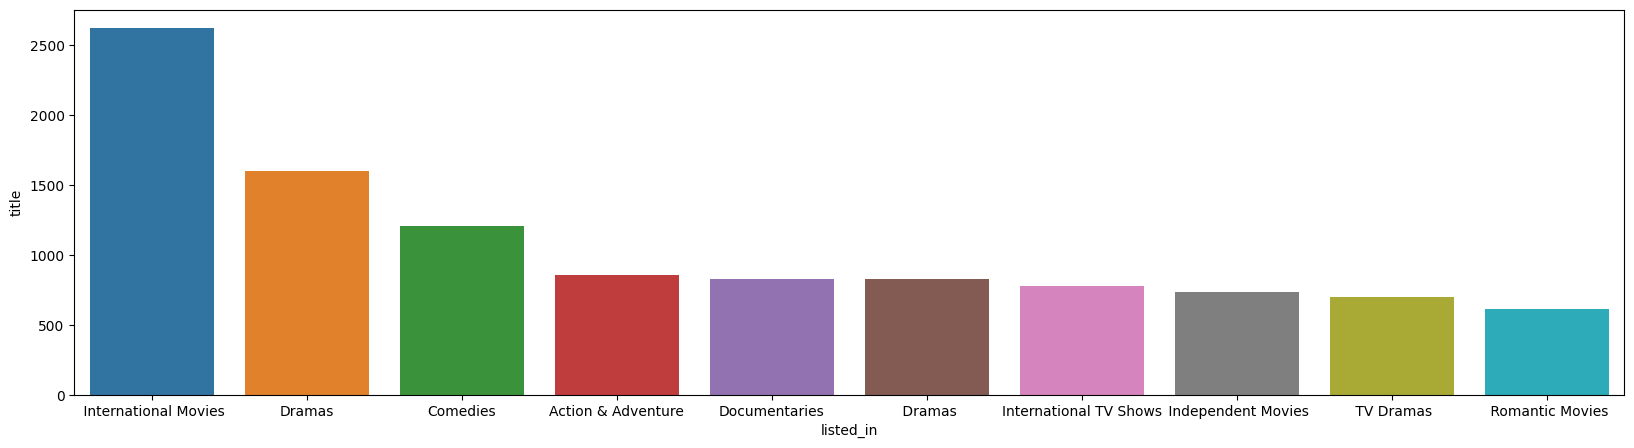

In [44]:
plt.figure(figsize=(20,5))
sns.barplot(x='listed_in',y='title', data=top10_genre)



---
**Find After how many days the movie will be added to Netflix after the release of the movie (you can consider the recent past data)**


---



In [45]:
df['date_added_year'] = df['date_added'].dt.year
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_week,date_added_month,date_added_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,nan,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",38,9,2021
1,s2,TV Show,Blood & Water,Unknown director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",38,9,2021
1,s2,TV Show,Blood & Water,Unknown director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",38,9,2021
1,s2,TV Show,Blood & Water,Unknown director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",38,9,2021
1,s2,TV Show,Blood & Water,Unknown director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",38,9,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...,9,3,2019
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...,9,3,2019
8806,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...,9,3,2019
8806,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...,9,3,2019


In [48]:
df['addedin-release'] = abs(df['date_added_year']-df['release_year'])
df.sort_values(ascending=False,by='addedin-release')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_week,date_added_month,date_added_year,addedin-release
4250,s4251,TV Show,Pioneers: First Women Filmmakers*,Unknown director,nan,Unknown,2018-12-30,1925,TV-14,1 Season,TV Shows,This collection restores films from women who ...,52,12,2018,93
1331,s1332,TV Show,Five Came Back: The Reference Films,Unknown director,nan,United States,2021-02-09,1945,TV-MA,1 Season,TV Shows,This collection includes 12 World War II-era p...,6,2,2021,76
8205,s8206,Movie,The Battle of Midway,John Ford,Henry Fonda,United States,2017-03-31,1942,TV-14,18 min,Documentaries,Director John Ford captures combat footage of ...,13,3,2017,75
7790,s7791,Movie,Prelude to War,Frank Capra,nan,United States,2017-03-31,1942,TV-14,52 min,Classic Movies,Frank Capra's documentary chronicles the rise ...,13,3,2017,75
7790,s7791,Movie,Prelude to War,Frank Capra,nan,United States,2017-03-31,1942,TV-14,52 min,Documentaries,Frank Capra's documentary chronicles the rise ...,13,3,2017,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4375,s4376,Movie,Target,Raditya Dika,Anggika Bolsterli,Indonesia,2018-11-20,2018,TV-14,91 min,Comedies,"Trapped in an empty building, nine people are ...",47,11,2018,0
4375,s4376,Movie,Target,Raditya Dika,Ria Ricis,Indonesia,2018-11-20,2018,TV-14,91 min,International Movies,"Trapped in an empty building, nine people are ...",47,11,2018,0
1780,s1781,Movie,Rogue City,Olivier Marchal,Jean Reno,France,2020-10-30,2020,TV-MA,116 min,Dramas,Caught in the crosshairs of police corruption ...,44,10,2020,0
1780,s1781,Movie,Rogue City,Olivier Marchal,David Belle,France,2020-10-30,2020,TV-MA,116 min,Thrillers,Caught in the crosshairs of police corruption ...,44,10,2020,0
